# Facial Expression Challenge

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import random
import tarfile
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Describe the Data

In [3]:
tar = tarfile.open("fer2013.tar.gz")
df = pd.read_csv(tar.extractfile("fer2013/fer2013.csv"))
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
# df = pd.read_csv("training/fer2013.csv")
# print(df.head())
print("Number of unique Emotions: %s" % (df.emotion.unique()))

Number of unique Emotions: [0 2 4 6 3 5 1]


# Helper Functions

In [0]:
# pixels is the series from the Dataframe
def extract_from_string(pixels):
    pixels = pixels.split(' ')
    pixels = np.array([int(i) for i in pixels])
    return np.reshape(pixels, (48, 48))    

def extract_image(pixels):
    pixels = pixels.as_matrix()[0] # The output is a string
    return extract_from_string(pixels)

# Overview of the images

In [0]:
def overview(total_rows, df):
    fig = plt.figure(figsize=(8,10))
    idx = 0
    for i, row in df.iterrows():
        input_img = extract_from_string(row.pixels)
        ax = fig.add_subplot(16,12,idx+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
        idx += 1
    plt.show()

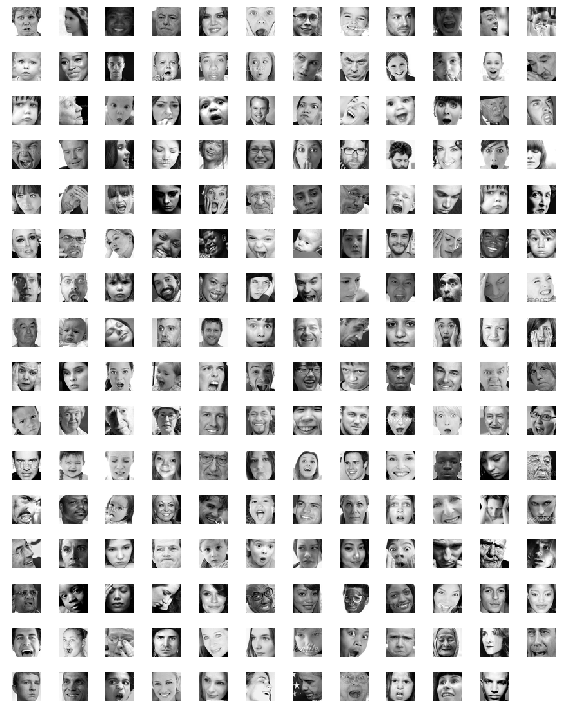

In [7]:
num_images = 191
df_new = df.sample(n=num_images)
overview(num_images, df_new) # overview of face data as thumbnails (private)

# Display one unique Emotion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


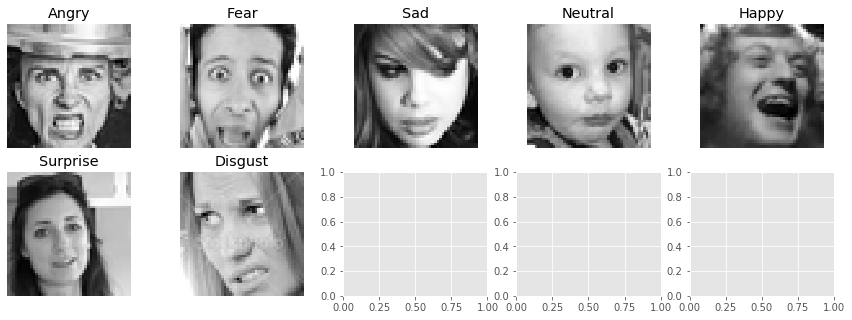

In [8]:
emotion_description = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}

unique_emotions = df.emotion.unique()
images = []
emotions = []
for emotion in unique_emotions:
    emotion_df = df[df.emotion == emotion].sample(n=1)
    images.append(extract_image(emotion_df.pixels))
    emotions.append(emotion)

cols = 5
fig, ax = plt.subplots(len(images) // cols + 1, cols, figsize=(15, 5))
global_img = None
for i,img in enumerate(images):
    row = i // cols
    col = i % cols
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].axis('off')
    ax[row, col].set_title(emotion_description[emotions[i]])
    global_img = img

# Data Distribution

0    4953
1     547
2    5121
3    8989
4    6077
5    4002
6    6198
Name: emotion, dtype: int64


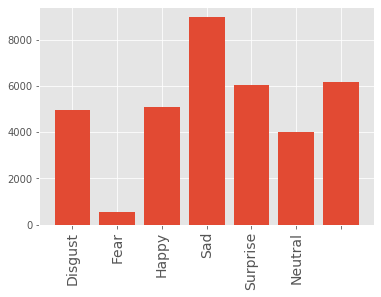

In [9]:
value_counts = df['emotion'].value_counts().sort_index()
ax = plt.subplot()
x_ticks_labels = [emotion_description[i] for i in range(len(value_counts))]
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=14)
ax.bar(range(0, len(value_counts)), value_counts)
print(value_counts)

# Use Image Augmentation to Augment the dataset

In [0]:
from scipy import ndimage
from skimage.transform import resize as imresize
# import skimage.transform.resize as imresize
from skimage import data, io, filters
from skimage.transform import swirl

import cv2

# Image Augmentation Techniques

In [0]:
def display_side_by_side(img1, img2):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(img1, cmap='gray')
    ax[0].axis('off')
    ax[1].imshow(img2, cmap='gray')
    ax[1].axis('off')    

In [0]:
def ogrid(img):
    nimg = np.copy(img)
    lx, ly = nimg.shape
    X, Y = np.ogrid[0:lx, 0:ly]
    mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4
    nimg[mask] = 0
    return nimg

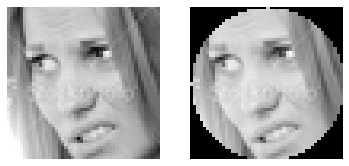

In [13]:
nimg = ogrid(global_img)
display_side_by_side(global_img, nimg)

In [0]:
def rotate_img(img):
    angle = np.random.choice(np.random.uniform(-45,45,100))
    nimg = np.copy(img)
    nimg = ndimage.rotate(nimg, angle)
    height, width = img.shape
    nimg = imresize(nimg, (width, height))
    return nimg

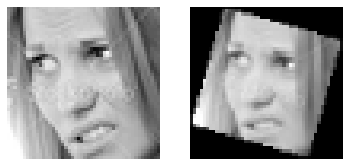

In [15]:
nimg = rotate_img(global_img)
display_side_by_side(global_img, nimg)

In [0]:
def blur_img(img):
    nimg = np.copy(img)
    sigma = np.random.randint(1, 2)
    blurred_img = ndimage.gaussian_filter(nimg, sigma=sigma)
    return blurred_img

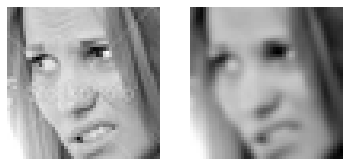

In [17]:
nimg = blur_img(global_img)
display_side_by_side(global_img, nimg)

In [0]:
def flip_img(img):
    nimg = np.copy(img)
    nimg = np.fliplr(nimg)
    return nimg

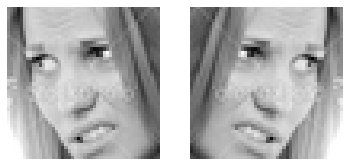

In [19]:
nimg = flip_img(global_img)
display_side_by_side(global_img, nimg)

In [0]:
def add_noise(img):
    nimg = np.copy(img)
    noise = np.random.normal(0,0.5,size=(48, 48)).astype(np.uint8) * 255
    nimg += noise
    nimg = np.clip(nimg, 0, 255)
    return nimg

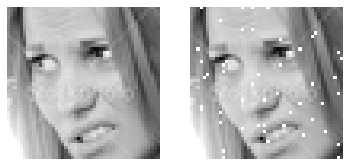

In [21]:
nimg = add_noise(global_img)
display_side_by_side(global_img, nimg)

In [0]:
def augment_img(img):
    methods = [ogrid, rotate_img, blur_img, flip_img, add_noise]

    method = np.random.choice(methods)
    return method(img)

In [23]:
max_value = df['emotion'].value_counts().max()
max_idx = df['emotion'].value_counts().idxmax()
print(max_idx, max_value)

3 8989


# Convert the pixels from the Dataframe into actual images

In [24]:
new_df = pd.DataFrame()
for i, row in df.iterrows():
    # Take this row and convert its pixel type to actual image
    new_df = new_df.append(pd.Series([row.emotion, extract_from_string(row.pixels), row.Usage], index=['emotion', 'pixels', 'Usage'], name=str(i)))
    
print(new_df)

             Usage  emotion                                             pixels
0         Training      0.0  [[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ...
1         Training      0.0  [[151, 150, 147, 155, 148, 133, 111, 140, 170,...
2         Training      2.0  [[231, 212, 156, 164, 174, 138, 161, 173, 182,...
3         Training      4.0  [[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ...
4         Training      6.0  [[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2...
...            ...      ...                                                ...
35882  PrivateTest      6.0  [[50, 36, 17, 22, 23, 29, 33, 39, 34, 37, 37, ...
35883  PrivateTest      3.0  [[178, 174, 172, 173, 181, 188, 191, 194, 196,...
35884  PrivateTest      0.0  [[17, 17, 16, 23, 28, 22, 19, 17, 25, 26, 20, ...
35885  PrivateTest      3.0  [[30, 28, 28, 29, 31, 30, 42, 68, 79, 81, 77, ...
35886  PrivateTest      2.0  [[19, 13, 14, 12, 13, 16, 21, 33, 50, 57, 71, ...

[35887 rows x 3 columns]


# Make all the Image categories the same size

In [0]:
augmented_df = new_df.copy()
unique_emotions = new_df.emotion.unique()
for emotion in unique_emotions:
    if emotion != max_idx:
        # This is the dataset we want to augment
        # Find the current length of this emotion
        emotion_df = augmented_df[augmented_df.emotion == emotion]
        current_size = len(emotion_df)
        images_2_generate = max_value - current_size
        for i in range(0, images_2_generate):
            # Choose a random image
            emotion_df = augmented_df[augmented_df.emotion == emotion].sample(n=1)
            current_img = emotion_df.pixels[0]
            nimg = augment_img(current_img)
            
            # Add a new row
            row = pd.Series([emotion, nimg, "Training"], index=["emotion", "pixels", "Usage"], name=str(i))
            augmented_df = augmented_df.append(row)

# New Data Distribution

0.0    8989
1.0    8989
2.0    8989
3.0    8989
4.0    8989
5.0    8989
6.0    8989
Name: emotion, dtype: int64


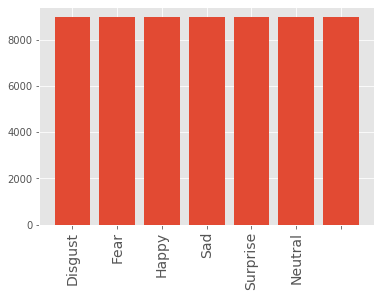

In [26]:
value_counts = augmented_df['emotion'].value_counts().sort_index()
ax = plt.subplot()
x_ticks_labels = [emotion_description[i] for i in range(len(value_counts))]
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=14)
ax.bar(range(0, len(value_counts)), value_counts)
print(value_counts)

# Network

In [27]:
pip install keras-tqdm

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Lambda, Activation
from keras.layers import Conv2D, MaxPooling2D, concatenate, Input
from keras.callbacks import TensorBoard
from keras.models import load_model, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras_tqdm import TQDMNotebookCallback
from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes, weightsPath=None):
        model = Sequential()
        # First set Conv Layers
        model.add(Conv2D(64, (3, 3), padding='valid', input_shape=(width, height, depth), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(BatchNormalization())

        # 2nd set Conv layers
        model.add(Conv2D(128, (3, 3), padding='valid', input_shape=(width, height, depth), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(BatchNormalization())

        model.add(Conv2D(256, (3, 3), padding='valid', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(BatchNormalization())

        model.add(Conv2D(512, (3, 3), padding='valid', activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))

        # Set of FC => Relu layers
        model.add(Flatten())
        model.add(Dense(256))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))

        # Sigmoid classifier
        model.add(Dense(classes))
        model.add(Activation('sigmoid'))

        if weightsPath is not None:
            model.load_weights(weightsPath)

        return model













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


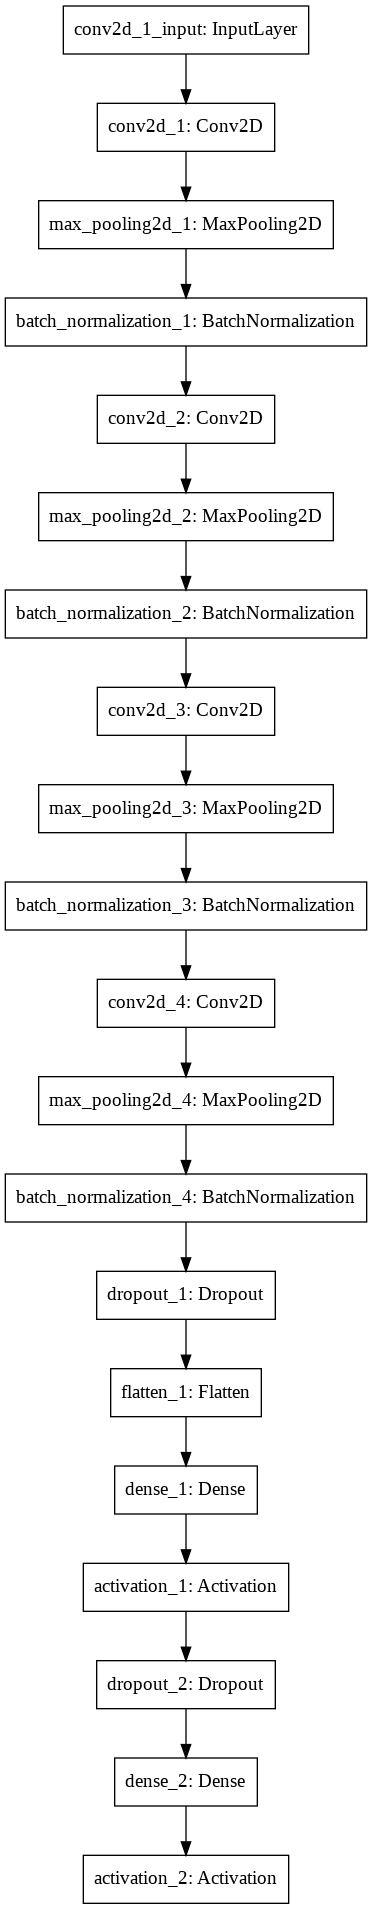

In [33]:
model = LeNet.build(48, 48, 1, 7)
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
generator = ImageDataGenerator( featurewise_center=True,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=20.,
                            width_shift_range=0.4,
                            height_shift_range=0.4,
                            shear_range=0.2,
                            zoom_range=0.2,
                            channel_shift_range=0.1,
                            fill_mode='nearest',
                            horizontal_flip=True,
                            vertical_flip=False,
                            rescale=1.2,
                            preprocessing_function=None)

train_df = augmented_df[augmented_df.Usage == "Training"]
test_df = augmented_df[augmented_df.Usage == "PrivateTest"]

trainData = np.array(train_df.pixels, dtype=pd.Series)
trainLabels = np.array(train_df.emotion, dtype=pd.Series)
trainLabels = np_utils.to_categorical(trainLabels, 7)


testData = np.array(train_df.pixels, dtype=pd.Series)
testLabels = np.array(train_df.emotion, dtype=pd.Series)
testLabels = np_utils.to_categorical(testLabels, 7)

td = []
for t in trainData:
    t = np.reshape(t, (48, 48, 1))
    td.append(t)
    
tl = []
for t in trainLabels:
    tl.append(t)

trainData = np.array(td)
trainLabels = np.array(tl)

trainData, trainLabels = shuffle(trainData, trainLabels)

td = []
for t in testData:
    t = np.reshape(t, (48, 48, 1))
    td.append(t)
    
tl = []
for t in testLabels:
    tl.append(t)

testData = np.array(td)
testLabels = np.array(tl)


generator.fit(trainData)
filepath = "lenet.best.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
batch_size = 128

use_augmentation = False
if use_augmentation:
    trainData, validationData, trainLabels, validationLabels = train_test_split(trainData, trainLabels, test_size=0.2, random_state=20)
    hist = model.fit_generator(generator.flow(trainData, trainLabels, batch_size=batch_size),
                          steps_per_epoch= int(len(trainData) / batch_size + 1),
                          epochs=200,
                          verbose=1,
                          validation_data=(validationData, validationLabels),
                          callbacks=[TensorBoard(log_dir='logs'), checkpoint, TQDMNotebookCallback(leave_inner=False, leave_outer=True)])
else:
    hist = model.fit(trainData, trainLabels, epochs=1, batch_size=batch_size,
              validation_split=0.2, callbacks=[TensorBoard(log_dir='logs'), checkpoint, TQDMNotebookCallback(leave_inner=False, leave_outer=True)], shuffle=True, verbose=1)

Train on 44596 samples, validate on 11149 samples


Epoch 1/1


44596/44596 [==============================] - 833s 19ms/step - loss: 0.3959 - acc: 0.8576 - val_loss: 0.3541 - val_acc: 0.8584


Epoch 00001: val_acc improved from -inf to 0.85839, saving model to lenet.best.h5


In [0]:
from keras.models import load_model

model = load_model('lenet.best.h5')

y_prob = model.predict(testData, batch_size=32, verbose=0)
y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in testLabels]

output = open('prediction.csv', 'w')
for p in y_pred:
    output.write(str(p))
    output.write("\n")

output.close()

In [0]:
def plot_subjects(start, end, y_pred, y_true, title=False):
    fig = plt.figure(figsize=(12,12))
    emotion = {0:'Angry', 1: "Disgust", 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
    for i in range(start, end+1):
        input_img = testData[i:(i+1),:,:,:]
        input_img = np.reshape(input_img, (48, 48))
        ax = fig.add_subplot(6,6,i+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        if y_pred[i] != y_true[i]:
            plt.xlabel("P: " + emotion[y_pred[i]] + " A: " + emotion[y_true[i]], color='#53b3cb',fontsize=10)
        else:
            plt.xlabel("P: " + emotion[y_pred[i]] + " A: " + emotion[y_true[i]], fontsize=10)
        if title:
            plt.title(emotion[y_pred[i]], color='blue')
        plt.tight_layout()
    plt.show()

In [0]:
def plot_probs(start,end, y_prob):
    fig = plt.figure(figsize=(12,12))
    color_set = ('.00', '.25', '.50', '.75')
    for i in range(start, end+1):
        ax = fig.add_subplot(6,6,i+1)
        # color_list = [color_set[(len(color_set) * int(val * 100)) // 100] for val in y_prob[i]]
        ax.bar(np.arange(0,7), y_prob[i], alpha=0.5)
        ax.set_xticks(np.arange(0.5,7.5,1))
        labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise','neutral']
        ax.set_xticklabels(labels, rotation=90, fontsize=10)
        ax.set_yticks(np.arange(0.0,1.1,0.5))
        plt.tight_layout()
    plt.show()

In [0]:
def plot_subjects_with_probs(start, end, y_prob):
    iter = (end - start)//7
    for i in np.arange(0,iter):
        plot_subjects(i*6,(i+1)*6-1, y_pred, y_true, title=False)
        plot_probs(i*6,(i+1)*6-1, y_prob)

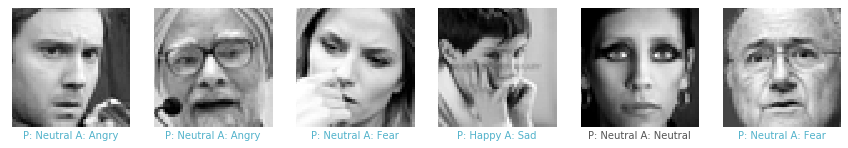

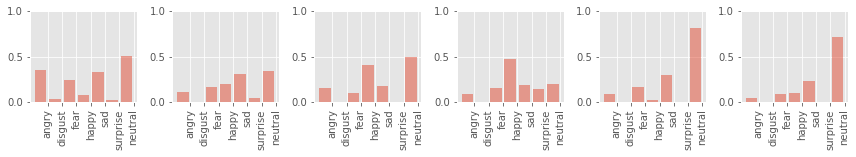

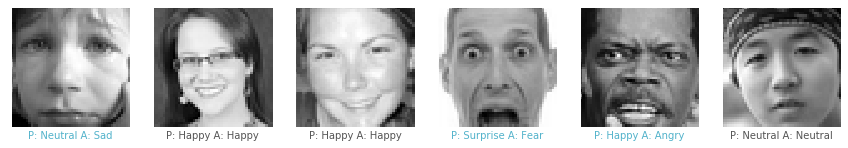

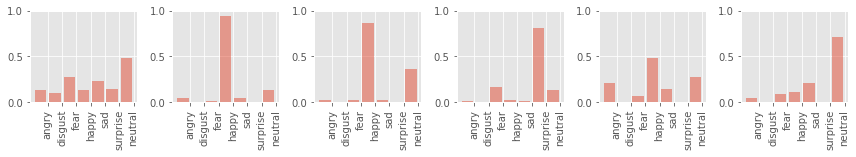

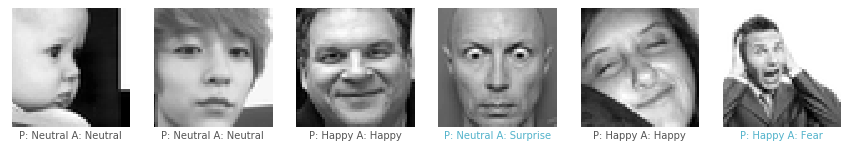

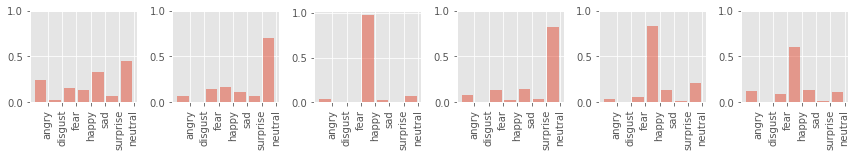

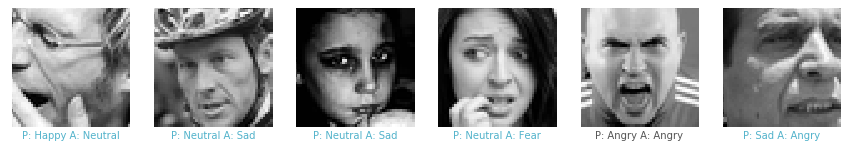

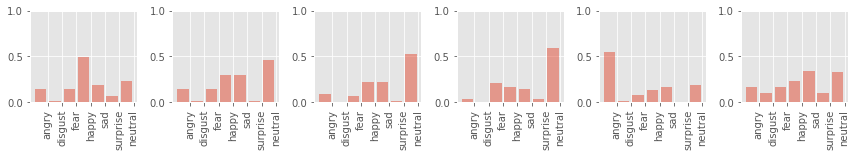

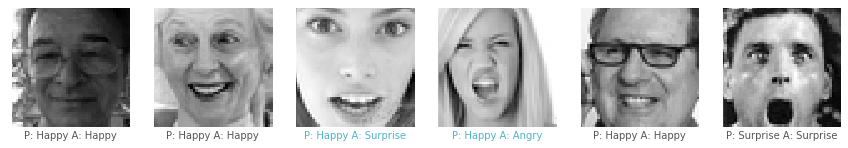

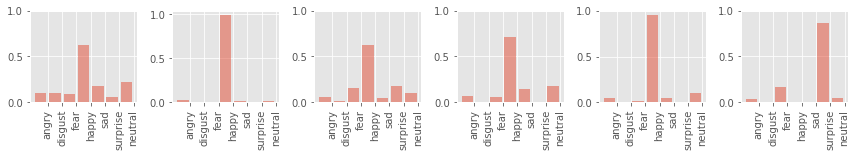

In [40]:
plot_subjects_with_probs(0, 36, y_prob)

# Plot the distribution of Predicted vs True

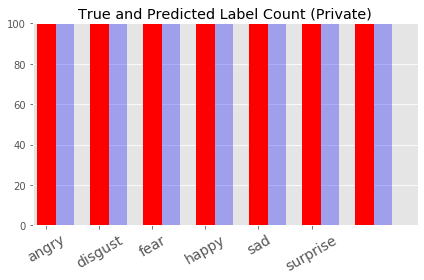

In [41]:
labels = ['angry', 'disgust','fear', 'happy', 'sad', 'surprise', 'neutral']
def plot_distribution(y_true, y_pred):
    ind = np.arange(1.5,8,1)  # the x locations for the groups
    width = 0.35   
    fig, ax = plt.subplots()
    true = ax.bar(ind, np.bincount(y_true), width, color="red", alpha=1.0)
    pred = ax.bar(ind + width, np.bincount(y_pred), width, color="blue", alpha=0.3)
    ax.set_xticks(np.arange(1.5,7,1))
    ax.set_xticklabels(labels, rotation=30, fontsize=14)
    ax.set_xlim([1.25, 8.5])
    ax.set_ylim([0, 100])
    ax.set_title('True and Predicted Label Count (Private)')
    plt.tight_layout()
    plt.show()

plot_distribution(y_true, y_pred)

# Confusion Matrix

In [0]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure(figsize=(6,6))
    matplotlib.rcParams.update({'font.size': 16})
    ax  = fig.add_subplot(111)
    matrix = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    fig.colorbar(matrix) 
    for i in range(0,7):
        for j in range(0,7):  
            ax.text(j,i,cm[i,j],va='center', ha='center')
    # ax.set_title('Confusion Matrix')
    ticks = np.arange(len(labels))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticks(ticks)
    ax.set_yticklabels(labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

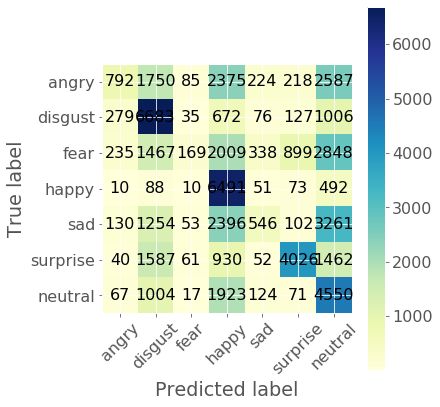

In [44]:
plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.YlGnBu)

# Classification Matrix

In [0]:
def class_precision(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    col = [cm[j,i] for j in range(0,len(labels))]
    return float(col[i])/sum(col)

def class_recall(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    row = [cm[i,j] for j in range(0,len(labels))]
    return float(row[i])/sum(row)

def class_accuracy(y_true, y_pred, emotion):
    cm = confusion_matrix(y_true, y_pred)
    i = [i for i, label in enumerate(labels) if label == emotion][0]
    tp = cm[i,i]
    fn = sum([cm[i,j] for j in range(0,6) if j != i])
    fp = sum([cm[j,i] for j in range(0,6) if j != i])
    tn = sum([cm[i,j] for j in range(0,6) for i in range(0,6)]) -(tp+fp+fn)
    return float(tp + tn)/sum([tp, fn, fp, tn])

In [46]:
# private test set
for emotion in labels:
    print(emotion.upper())
    print('   acc = {}'.format(class_accuracy(y_true, y_pred, emotion)))
    print('  prec = {}'.format(class_precision(y_true, y_pred, emotion)))
    print('recall = {}\n'.format(class_recall(y_true, y_pred, emotion)))

ANGRY
   acc = 0.8528610354223434
  prec = 0.5099806825499034
recall = 0.09861785580874113

DISGUST
   acc = 0.7981174139212286
  prec = 0.4831200751825345
recall = 0.7527596305474206

FEAR
   acc = 0.8570996064184075
  prec = 0.3930232558139535
recall = 0.021217827997489013

HAPPY
   acc = 0.762915256103267
  prec = 0.3864610621576566
recall = 0.8996534996534996

SAD
   acc = 0.8713015715740512
  prec = 0.38695960311835575
recall = 0.0705244122965642

SURPRISE
   acc = 0.8874576830980101
  prec = 0.7298767222625091
recall = 0.4935033096347144

NEUTRAL
   acc = 0.5909503756915201
  prec = 0.2807602122670616
recall = 0.5866425992779783



In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

       angry       0.51      0.10      0.17      8031
     disgust       0.48      0.75      0.59      8878
        fear       0.39      0.02      0.04      7965
       happy       0.39      0.90      0.54      7215
         sad       0.39      0.07      0.12      7742
    surprise       0.73      0.49      0.59      8158
     neutral       0.28      0.59      0.38      7756

    accuracy                           0.42     55745
   macro avg       0.45      0.42      0.35     55745
weighted avg       0.46      0.42      0.35     55745



# Visualize the Keras Layers

In [0]:
# https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer

from keras import backend as K

def layers_overview(images):
    total_rows = len(images)
    fig = plt.figure(figsize=(8,10))
    idx = 0
    for i, row in df.iterrows():
        input_img = img
        ax = fig.add_subplot(16,12,idx+1)
        ax.imshow(input_img, cmap=matplotlib.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
        idx += 1
    plt.show()

def get_layer_outputs(img, use_dropout):
    test_image = img
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    dropout = 1 if use_dropout else 0
    layer_outputs_list = [op([test_image, dropout]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(img, layer_number, use_dropout):    
    layer_outputs = get_layer_outputs(img, use_dropout)

    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]


#     for img in L:
#         plt.figure(figsize=(2, 2))
#         plt.imshow(img, interpolation='nearest', cmap='gray')
    layers_overview(L)

In [0]:
test_img = [testData[0]]
plot_layer_outputs(np.array(test_img), 2, use_dropout=False)

(46, 46, 64)
-------------------
(23, 23, 64)
-------------------
(23, 23, 64)
-------------------
(21, 21, 128)
-------------------
(10, 10, 128)
-------------------
(10, 10, 128)
-------------------
(8, 8, 256)
-------------------
(4, 4, 256)
-------------------
(4, 4, 256)
-------------------
(2, 2, 512)
-------------------
(1, 1, 512)
-------------------
(1, 1, 512)
-------------------
(1, 1, 512)
-------------------
(512,)
-------------------
(256,)
-------------------
(256,)
-------------------
(256,)
-------------------
(7,)
-------------------
(7,)
-------------------
